<a href="https://colab.research.google.com/github/JulioXa69/Thesis_Public_Repository/blob/Thesis/Tesis_Maestria_Ing_Julio_Hallo_201020022065_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Raw Data Set Construction***

# **Data Corpus Analysis and Data Set Construction**
2020-07-12
JXHALLO: Construction and Review of data sets in order to know if they are independent. Processing Raw Data from:

Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/

Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html

 ***Raw Data Set Outputs:***
* TestDataSet
* TrainDataSet
* NonDupTest
* DupTest
* NonDupTrain
* DupTrain

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x

In [ ]:
# 4- JXHALLO Download Data Corpus

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Version 1.0: 2020-04-24

url = "/Users/juliohallo/Documents/Personal/Maestria 2018/Python/Corpus/all_gs.json"

df1 = pd.read_json(url, #compression='gzip'
                  lines=True)

In [ ]:
df1.shape


In [ ]:
# 5- JXHALLO Download Data Corpus

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Version 1.0: 2020-04-24

url = "/Users/juliohallo/Documents/Personal/Maestria 2018/Python/Corpus/all_train/all_train_small.json.gz"

df2 = pd.read_json(url, compression='gzip',lines=True)

df2.shape

In [ ]:
Left_join = pd.merge(df2,  
                     df1,  
                     on ='pair_id',  
                     how ='left') 
Left_join 

In [ ]:
Left_join.shape

In [ ]:
Left_join.isnull().sum()

In [ ]:
# 6- JXHALLO Download Data Corpus

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Version 1.0: 2020-04-24

url = "/Users/juliohallo/Documents/Personal/Maestria 2018/Python/Corpus/all_train/all_train_medium.json.gz"

df3 = pd.read_json(url, compression='gzip',lines=True)

df3.shape

In [ ]:
# 7- JXHALLO Download Data Corpus

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Version 1.0: 2020-04-24

url = "/Users/juliohallo/Documents/Personal/Maestria 2018/Python/Corpus/all_train/all_train_large.json.gz"

df4 = pd.read_json(url, compression='gzip',lines=True)

df4.shape

In [ ]:
# 8- JXHALLO Download Data Corpus

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Version 1.0: 2020-04-24

url = "/Users/juliohallo/Documents/Personal/Maestria 2018/Python/Corpus/all_train/all_train_xlarge.json.gz"

df5 = pd.read_json(url, compression='gzip',lines=True)

df5.shape

In [ ]:
Left_join_xl_l = pd.merge(df5,  
                     df4,  
                     on ='pair_id',  
                     how ='left') 
Left_join_xl_l
Left_join_xl_l.isnull().sum()

In [ ]:
Left_join_l_m = pd.merge(df4,  
                     df3,  
                     on ='pair_id',  
                     how ='left') 
Left_join_l_m.isnull().sum()

In [ ]:
Left_join_l_m = pd.merge(df4,  
                     df3,  
                     on ='pair_id',  
                     how ='left') 
Left_join_l_m.isnull().sum()

In [ ]:
Left_join_m_gs = pd.merge(df3,  
                     df1,  
                     on ='pair_id',  
                     how ='left') 
Left_join_m_gs.shape 
Left_join_m_gs.isnull().sum()

In [ ]:
Left_join_l_gs = pd.merge(df4,  
                     df1,  
                     on ='pair_id',  
                     how ='left') 
Left_join_l_gs.shape
Left_join_l_gs.isnull().sum()

In [ ]:
Left_join_xl_gs = pd.merge(df5,  
                     df1,  
                     on ='pair_id',  
                     how ='left') 
Left_join_xl_gs.shape

In [ ]:
Left_join_xl_gs.isnull().sum()

In [ ]:
Left_join_xl_s = pd.merge(df5,  
                     df2,  
                     on ='pair_id',  
                     how ='left') 
Left_join_xl_s.shape

In [ ]:
Left_join_xl_s.isnull().sum()

In [ ]:
Left_join_xl_m = pd.merge(df5,  
                     df3,  
                     on ='pair_id',  
                     how ='left') 
Left_join_xl_m.shape

In [ ]:
Left_join_xl_m.isnull().sum()

In [ ]:
Left_join_xl_l = pd.merge(df5,  
                     df4,  
                     on ='pair_id',  
                     how ='left') 
Left_join_xl_l.shape

In [ ]:
Left_join_xl_l.isnull().sum()

In [ ]:
Left_join_xl_xl = pd.merge(df5,  
                     df5,  
                     on ='pair_id',  
                     how ='left') 
Left_join_xl_xl.shape

In [ ]:
Left_join_xl_xl.isnull().sum()

In [ ]:
Left_join_l_s = pd.merge(df4,  
                     df2,  
                     on ='pair_id',  
                     how ='left') 
Left_join_l_s.shape

In [ ]:
Left_join_l_s.isnull().sum()

In [ ]:
Left_join_l_m = pd.merge(df4,  
                     df3,  
                     on ='pair_id',  
                     how ='left') 
Left_join_l_m.shape

In [ ]:
Left_join_l_m.isnull().sum()

In [ ]:
Left_join_l_l = pd.merge(df4,  
                     df4,  
                     on ='pair_id',  
                     how ='left') 
Left_join_l_l.shape

In [ ]:
Left_join_l_l.isnull().sum()

In [ ]:
Left_join_l_xl = pd.merge(df4,  
                     df5,  
                     on ='pair_id',  
                     how ='left') 
Left_join_l_xl.shape

In [ ]:
Left_join_l_xl.isnull().sum()

In [ ]:
Left_join_m_s = pd.merge(df3,  
                     df2,  
                     on ='pair_id',  
                     how ='left') 
Left_join_m_s.shape

In [ ]:
Left_join_m_s.isnull().sum()

In [ ]:
Left_join_m_l = pd.merge(df3,  
                     df4,  
                     on ='pair_id',  
                     how ='left') 
Left_join_m_l.shape

In [ ]:
Left_join_m_l.isnull().sum()

In [ ]:
Left_join_m_xl = pd.merge(df3,  
                     df5,  
                     on ='pair_id',  
                     how ='left') 
Left_join_m_xl.shape

In [ ]:
Left_join_m_xl.isnull().sum()

In [ ]:
Left_join_s_m = pd.merge(df2,  
                     df3,  
                     on ='pair_id',  
                     how ='left') 
Left_join_s_m.shape

In [ ]:
Left_join_s_m.isnull().sum()

In [ ]:
Left_join_s_l = pd.merge(df2,  
                     df4,  
                     on ='pair_id',  
                     how ='left') 
Left_join_s_l.shape

In [ ]:
Left_join_s_l.isnull().sum()

In [ ]:
Left_join_s_xl = pd.merge(df2,  
                     df5,  
                     on ='pair_id',  
                     how ='left') 
Left_join_s_xl.shape

In [ ]:
Left_join_s_xl.isnull().sum()

In [ ]:
# 9- JXHALLO Append All Dataframes

# all_train_xlarge_sample.json.gz, all_train_large.json.gz, all_train_medium.json.gz, all_train_small.json.gz
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Version 1.0: 2020-07-12



In [ ]:
AppendedDataFile = df5.append(df4)
AppendedDataFile.shape

In [ ]:
AppendedDataFile = AppendedDataFile.append(df3)
AppendedDataFile.shape

In [ ]:
AppendedDataFile = AppendedDataFile.append(df2)
AppendedDataFile.shape

In [ ]:
TotalRecords = 214736+103411+25567+9038
print (TotalRecords)

In [ ]:
AppendedDataFile.isnull().sum()

In [ ]:
AppendedDataFile.sort_values("pair_id", inplace=True)

In [ ]:
AppendedDataFile.drop_duplicates(subset ="pair_id", keep='first', inplace=True)
AppendedDataFile.isnull().sum()

In [ ]:
AppendedDataFile.shape

In [ ]:
print (AppendedDataFile.query('label == "1"').label.count())

In [ ]:
print (AppendedDataFile.query('label == "0"').label.count())

In [ ]:
#2020-07-20 Saviing AppendedDataFile using pickle
AppendedDataFile.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/AppendedDataFile.pkl')

In [ ]:
#2020-07-20 Reading AppendedDataFile using pickle
AppendedDataFile=pd.read_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/AppendedDataFile.pkl')

In [ ]:
print(AppendedDataFile.shape)

In [ ]:
AppendedDataFile.describe()

In [ ]:
AppendedDataFile

In [ ]:
print (AppendedDataFile.query('category_left == "Jewelry"').label.count())

In [ ]:
AppendedDataFile['category_left'].value_counts().plot(kind='bar')

In [ ]:
AppendedDataFile['category_right'].value_counts().plot(kind='bar')

In [ ]:
AppendedDataFile['label'].value_counts('')

In [ ]:
AppendedDataFile['category_left'].value_counts()

In [ ]:
subset_df = AppendedDataFile[(AppendedDataFile["category_right"] == 'Computers_and_Accessories')&(AppendedDataFile["label"] == 0)]

In [ ]:
subset_df.shape

In [ ]:
subset_df = subset_df[(subset_df["label"] == 1)]
subset_df.shape

In [ ]:
# 2020-07-20: Create Dataframe with lable = 1 of all four categories
# Computers_and_Accessories_Dup
# Shoes
# Camera_and_Photo
# Jewelry
# Save into pickle
Computers_and_Accessories_Dup  = AppendedDataFile[(AppendedDataFile["category_left"] == 'Computers_and_Accessories')&(AppendedDataFile["label"] == 1)]
Shoes_Dup  = AppendedDataFile[(AppendedDataFile["category_left"] == 'Shoes')&(AppendedDataFile["label"] == 1)]
Camera_and_Photo_Dup  = AppendedDataFile[(AppendedDataFile["category_left"] == 'Camera_and_Photo')&(AppendedDataFile["label"] == 1)]
Jewelry_Dup  = AppendedDataFile[(AppendedDataFile["category_left"] == 'Jewelry')&(AppendedDataFile["label"] == 1)]
print("Computers_and_Accessories_Dup.shape")
print(Computers_and_Accessories_Dup.shape)
print("Shoes_Dup.shape")
print(Shoes_Dup.shape)
print("Camera_and_Photo_Dup.shape")
print(Camera_and_Photo_Dup.shape)
print("Jewelry_Dup.shape")
print(Jewelry_Dup.shape)

In [ ]:
Computers_and_Accessories_Dup.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Computers_and_Accessories_Dup.pkl')
Shoes_Dup.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Shoes_Dup.pkl')
Camera_and_Photo_Dup.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Camera_and_Photo_Dup.pkl')
Jewelry_Dup.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Jewelry_Dup.pkl')

In [ ]:
# 2020-07-20: Create Dataframe with lable = 0 of all four categories
# Computers_and_Accessories_Dup
# Shoes
# Camera_and_Photo
# Jewelry
# Save into pickle
Computers_and_Accessories_NonDup  = AppendedDataFile[(AppendedDataFile["category_left"] == 'Computers_and_Accessories')&(AppendedDataFile["label"] == 0)]
Shoes_NonDup  = AppendedDataFile[(AppendedDataFile["category_left"] == 'Shoes')&(AppendedDataFile["label"] == 0)]
Camera_and_Photo_NonDup  = AppendedDataFile[(AppendedDataFile["category_left"] == 'Camera_and_Photo')&(AppendedDataFile["label"] == 0)]
Jewelry_NonDup  = AppendedDataFile[(AppendedDataFile["category_left"] == 'Jewelry')&(AppendedDataFile["label"] == 0)]
print("Computers_and_Accessories_NonDup.shape")
print(Computers_and_Accessories_NonDup.shape)
print("Shoes_NonDup.shape")
print(Shoes_NonDup.shape)
print("Camera_and_Photo_NonDup.shape")
print(Camera_and_Photo_NonDup.shape)
print("Jewelry_NonDup.shape")
print(Jewelry_NonDup.shape)

In [ ]:
Computers_and_Accessories_NonDup.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Computers_and_Accessories_NonDup.pkl')
Shoes_NonDup.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Shoes_NonDup.pkl')
Camera_and_Photo_NonDup.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Camera_and_Photo_NonDup.pkl')
Jewelry_NonDup.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Jewelry_NonDup.pkl')

In [ ]:
# 2020-07-20: Create Dataframe for Train and Test with lable = 1 of all four categories
# Computers_and_Accessories_Dup
# Save into pickle

print("Computers_and_Accessories_Dup.shape")
print(Computers_and_Accessories_Dup.shape)

Computers_and_Accessories_Dup_Train = Computers_and_Accessories_Dup.sample(frac=0.7)
print("Computers_and_Accessories_Dup_Train.shape")
print(Computers_and_Accessories_Dup_Train.shape)

Computers_and_Accessories_Dup_Test = Computers_and_Accessories_Dup.append(Computers_and_Accessories_Dup_Train)
print("Computers_and_Accessories_Dup_Test.shape")
print(Computers_and_Accessories_Dup_Test.shape)
Computers_and_Accessories_Dup_Test.drop_duplicates(subset ="pair_id", keep=False, inplace=True)
print("Computers_and_Accessories_Dup_Test.shape")
print(Computers_and_Accessories_Dup_Test.shape)


In [ ]:
Computers_and_Accessories_Dup_Train.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Computers_and_Accessories_Dup_Train.pkl')
Computers_and_Accessories_Dup_Test.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Computers_and_Accessories_Dup_Test.pkl')

In [ ]:
# 2020-07-20: Create Dataframe for Train and Test with lable = 1 of all four categories
# Shoes_Dup
# Save into pickle
print("Shoes_Dup.shape")
print(Shoes_Dup.shape)

Shoes_Dup_Train = Shoes_Dup.sample(frac=0.7)
print("Shoes_Dup_Train.shape")
print(Shoes_Dup_Train.shape)

Shoes_Dup_Test = Shoes_Dup.append(Shoes_Dup_Train)
print("Shoes_Dup_Test.shape")
print(Shoes_Dup_Test.shape)
Shoes_Dup_Test.drop_duplicates(subset ="pair_id", keep=False, inplace=True)
print("Shoes_Dup_Test.shape")
print(Shoes_Dup_Test.shape)


In [ ]:
Shoes_Dup_Train.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Shoes_Dup_Train.pkl')
Shoes_Dup_Test.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Shoes_Dup_Test.pkl')

In [ ]:
# 2020-07-20: Create Dataframe for Train and Test with lable = 1 of all four categories
# Camera_and_Photo
# Save into pickle
print("Camera_and_Photo_Dup.shape")
print(Camera_and_Photo_Dup.shape)

Camera_and_Photo_Dup_Train = Camera_and_Photo_Dup.sample(frac=0.7)
print("Camera_and_Photo_Dup_Train.shape")
print(Camera_and_Photo_Dup_Train.shape)

Camera_and_Photo_Dup_Test = Camera_and_Photo_Dup.append(Camera_and_Photo_Dup_Train)
print("Camera_and_Photo_Dup_Test.shape")
print(Camera_and_Photo_Dup_Test.shape)
Camera_and_Photo_Dup_Test.drop_duplicates(subset ="pair_id", keep=False, inplace=True)
print("Camera_and_Photo_Dup_Test.shape")
print(Camera_and_Photo_Dup_Test.shape)





In [ ]:
Camera_and_Photo_Dup_Train.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Camera_and_Photo_Dup_Train.pkl')
Camera_and_Photo_Dup_Test.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Camera_and_Photo_Dup_Test.pkl')

In [ ]:
# 2020-07-20: Create Dataframe for Train and Test with lable = 1 of all four categories
# Jewelry
# Save into pickle
print("Jewelry_Dup.shape")
print(Jewelry_Dup.shape)

Jewelry_Dup_Train = Jewelry_Dup.sample(frac=0.7)
print("Jewelry_Dup_Train.shape")
print(Jewelry_Dup_Train.shape)

Jewelry_Dup_Test = Jewelry_Dup.append(Jewelry_Dup_Train)
print("Jewelry_Dup_Test.shape")
print(Jewelry_Dup_Test.shape)
Jewelry_Dup_Test.drop_duplicates(subset ="pair_id", keep=False, inplace=True)
print("Jewelry_Dup_Test.shape")
print(Jewelry_Dup_Test.shape)



In [ ]:
Jewelry_Dup_Train.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Jewelry_Dup_Train.pkl')
Jewelry_Dup_Test.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Jewelry_Dup_Test.pkl')

In [ ]:
# 2020-07-20: Create Dataframe for Train and Test with lable = 0, but ensure 27.27% Dups in all DataSet like in All_GS
# Jewelry Dups = 10,027
# Jewlry New NonDups = (10,027/0.2717)*(1-0.2727) = 26,742
# NEW TOTAL DATASET = 36,769
# Save into pickle
print("Jewelry_NonDup.shape")
print(Jewelry_NonDup.shape)

Jewelry_NonDup_New = Jewelry_NonDup.sample(n=26742)
print("Jewelry_NonDup_New.shape")
print(Jewelry_NonDup_New.shape)

Jewelry_NonDup_Train = Jewelry_NonDup_New.sample(frac=0.7)
print("Jewelry_NonDup_Train.shape")
print(Jewelry_NonDup_Train.shape)

Jewelry_NonDup_Test = Jewelry_NonDup_New.append(Jewelry_NonDup_Train)
print("Jewelry_NonDup_Test.shape")
print(Jewelry_NonDup_Test.shape)
Jewelry_NonDup_Test.drop_duplicates(subset ="pair_id", keep=False, inplace=True)
print("Jewelry_NonDup_Test.shape")
print(Jewelry_NonDup_Test.shape)

In [ ]:
Jewelry_NonDup_Train.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Jewelry_NonDup_Train.pkl')
Jewelry_NonDup_Test.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Jewelry_NonDup_Test.pkl')

In [ ]:
# 2020-07-20: Create Dataframe for Train and Test with lable = 0, but ensure 27.27% Dups in all DataSet like in All_GS
# Camera_and_Photo Dups = 7,530
# Camera_and_Photo New NonDups = (7,530/0.2727)*(1-0.2727) = 20,083
# NEW TOTAL DATASET = 27,613
# Save into pickle
print("Camera_and_Photo_NonDup.shape")
print(Camera_and_Photo_NonDup.shape)

Camera_and_Photo_NonDup_New = Camera_and_Photo_NonDup.sample(n=20083)
print("Camera_and_Photo_NonDup_New.shape")
print(Camera_and_Photo_NonDup_New.shape)

Camera_and_Photo_NonDup_Train = Camera_and_Photo_NonDup_New.sample(frac=0.7)
print("Camera_and_Photo_NonDup_Train.shape")
print(Camera_and_Photo_NonDup_Train.shape)

Camera_and_Photo_NonDup_Test = Camera_and_Photo_NonDup_New.append(Camera_and_Photo_NonDup_Train)
print("Camera_and_Photo_NonDup_Test.shape")
print(Camera_and_Photo_NonDup_Test.shape)
Camera_and_Photo_NonDup_Test.drop_duplicates(subset ="pair_id", keep=False, inplace=True)
print("Camera_and_Photo_NonDup_Test.shape")
print(Camera_and_Photo_NonDup_Test.shape)

In [ ]:
Camera_and_Photo_NonDup_Train.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Camera_and_Photo_NonDup_Train.pkl')
Camera_and_Photo_NonDup_Test.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Camera_and_Photo_NonDup_Test.pkl')

In [ ]:
# 2020-07-20: Create Dataframe for Train and Test with lable = 0, but ensure 27.27% Dups in all DataSet like in All_GS
# Shoes Dups = 4,527
# Shoes New NonDups = (4,527/0.2727)*(1-0.2727) = 12,074
# NEW TOTAL DATASET = 16601
# Save into pickle
print("Shoes_NonDup.shape")
print(Shoes_NonDup.shape)

Shoes_NonDup_New = Camera_and_Photo_NonDup.sample(n=12074)
print("Shoes_NonDup_New.shape")
print(Shoes_NonDup_New.shape)

Shoes_NonDup_Train = Shoes_NonDup_New.sample(frac=0.7)
print("Shoes_NonDup_Train.shape")
print(Shoes_NonDup_Train.shape)

Shoes_NonDup_Test = Shoes_NonDup_New.append(Shoes_NonDup_Train)
print("Shoes_NonDup_Test.shape")
print(Shoes_NonDup_Test.shape)
Shoes_NonDup_Test.drop_duplicates(subset ="pair_id", keep=False, inplace=True)
print("Shoes_NonDup_Test.shape")
print(Shoes_NonDup_Test.shape)

In [ ]:
Shoes_NonDup_Train.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Shoes_NonDup_Train.pkl')
Shoes_NonDup_Test.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Shoes_NonDup_Test.pkl')

In [ ]:
# 2020-07-20: Create Dataframe for Train and Test with lable = 0, but ensure 27.27% Dups in all DataSet like in All_GS
# Computers_and_Accessories Dups = 10,244
# Computers_and_Accessories New NonDups = (10,244/0.2727)*(1-0.2727) = 27,321
# NEW TOTAL DATASET = 37,565
# Save into pickle
print("Computers_and_Accessories_NonDup.shape")
print(Computers_and_Accessories_NonDup.shape)

Computers_and_Accessories_NonDup_New = Computers_and_Accessories_NonDup.sample(n=27321)
print("Computers_and_Accessories_NonDup_New.shape")
print(Computers_and_Accessories_NonDup_New.shape)

Computers_and_Accessories_NonDup_Train = Computers_and_Accessories_NonDup_New.sample(frac=0.7)
print("Computers_and_Accessories_NonDup_Train.shape")
print(Computers_and_Accessories_NonDup_Train.shape)

Computers_and_Accessories_NonDup_Test = Computers_and_Accessories_NonDup_New.append(Computers_and_Accessories_NonDup_Train)
print("Computers_and_Accessories_NonDup_Test.shape")
print(Computers_and_Accessories_NonDup_Test.shape)
Computers_and_Accessories_NonDup_Test.drop_duplicates(subset ="pair_id", keep=False, inplace=True)
print("Computers_and_Accessories_NonDup_Test.shape")
print(Computers_and_Accessories_NonDup_Test.shape)

In [ ]:
Computers_and_Accessories_NonDup_Train.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Computers_and_Accessories_NonDup_Train.pkl')
Computers_and_Accessories_NonDup_Test.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/Computers_and_Accessories_NonDup_Test.pkl')

In [ ]:
# NonDupTrain = Computers_and_Accessories_NonDup_Train.append(Shoes_NonDup_Train,Camera_and_Photo_NonDup_Train,Jewelry_NonDup_Train)
NonDupTrain = Computers_and_Accessories_NonDup_Train.append(Shoes_NonDup_Train)
NonDupTrain = NonDupTrain.append(Camera_and_Photo_NonDup_Train)
NonDupTrain = NonDupTrain.append(Jewelry_NonDup_Train)
print("Computers_and_Accessories_NonDup_Train.shape")
print(Computers_and_Accessories_NonDup_Train.shape)
print("Shoes_NonDup_Train.shape")
print(Shoes_NonDup_Train.shape)
print("Camera_and_Photo_NonDup_Train.shape")
print(Camera_and_Photo_NonDup_Train.shape)
print("Jewelry_NonDup_Train.shape")
print(Jewelry_NonDup_Train.shape)
print("NonDupTrain.shape")
print(NonDupTrain.shape)

In [ ]:
# NonDupTest = Computers_and_Accessories_NonDup_Test.append(Shoes_NonDup_Test,Camera_and_Photo_NonDup_Test,Jewelry_NonDup_Test)
NonDupTest = Computers_and_Accessories_NonDup_Test.append(Shoes_NonDup_Test)
NonDupTest = NonDupTest.append(Camera_and_Photo_NonDup_Test)
NonDupTest = NonDupTest.append(Jewelry_NonDup_Test)
print("Computers_and_Accessories_NonDup_Test.shape")
print(Computers_and_Accessories_NonDup_Test.shape)
print("Shoes_NonDup_Test.shape")
print(Shoes_NonDup_Test.shape)
print("Camera_and_Photo_NonDup_Test.shape")
print(Camera_and_Photo_NonDup_Test.shape)
print("Jewelry_NonDup_Test.shape")
print(Jewelry_NonDup_Test.shape)
print("NonDupTest.shape")
print(NonDupTest.shape)

In [ ]:
# DupTrain = Computers_and_Accessories_Dup_Train.append(Shoes_Dup_Train,Camera_and_Photo_Dup_Train,Jewelry_Dup_Train)
DupTrain = Computers_and_Accessories_Dup_Train.append(Shoes_Dup_Train)
DupTrain = DupTrain.append(Camera_and_Photo_Dup_Train)
DupTrain = DupTrain.append(Jewelry_Dup_Train)
print("Computers_and_Accessories_Dup_Train.shape")
print(Computers_and_Accessories_Dup_Train.shape)
print("Shoes_Dup_Train.shape")
print(Shoes_Dup_Train.shape)
print("Camera_and_Photo_Dup_Train.shape")
print(Camera_and_Photo_Dup_Train.shape)
print("Jewelry_Dup_Train.shape")
print(Jewelry_Dup_Train.shape)
print("DupTrain.shape")
print(DupTrain.shape)

In [ ]:
# DupTest = Computers_and_Accessories_Dup_Test.append(Shoes_Dup_Test,Camera_and_Photo_Dup_Test,Jewelry_Dup_Test)
DupTest = Computers_and_Accessories_Dup_Test.append(Shoes_Dup_Test)
DupTest = DupTest.append(Camera_and_Photo_Dup_Test)
DupTest = DupTest.append(Jewelry_Dup_Test)
print("Computers_and_Accessories_Dup_Test.shape")
print(Computers_and_Accessories_Dup_Test.shape)
print("Shoes_Dup_Test.shape")
print(Shoes_Dup_Test.shape)
print("Camera_and_Photo_Dup_Test.shape")
print(Camera_and_Photo_Dup_Test.shape)
print("Jewelry_Dup_Test.shape")
print(Jewelry_Dup_Test.shape)
print("DupTest.shape")
print(DupTest.shape)

In [ ]:
print (DupTest.query('label == "1"').label.count())
print (DupTrain.query('label == "1"').label.count())
print (NonDupTest.query('label == "0"').label.count())
print (NonDupTrain.query('label == "0"').label.count())

In [ ]:
TestDataSet = NonDupTest.append(DupTest)
TrainDataSet = NonDupTrain.append(DupTrain)
print (TestDataSet.query('label == "1"').label.count())
print (TestDataSet.query('label == "0"').label.count())
print (TrainDataSet.query('label == "1"').label.count())
print (TrainDataSet.query('label == "0"').label.count())
print (TrainDataSet.shape)
print (TestDataSet.shape)

In [ ]:
TestDataSet.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/TestDataSet.pkl')
TrainDataSet.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/TrainDataSet.pkl')
NonDupTest.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/NonDupTest.pkl')
DupTest.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/DupTest.pkl')
NonDupTrain.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/NonDupTrain.pkl')
DupTrain.to_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/DupTrain.pkl')

# ***Preprocessing Data Corpus***

Word 2 Vec Data Processing

# Preprocessing Data Corpus: Preprocessing of TrainDataSet.pkl with Word2Vec v2
2020-08-17
JXHALLO: Preprocessing of TrainDataSet.pkl with Word2Vec v2: Applied transformation to create matrix (n,501) for word2vec transformation

 ***Preprocessed Data Set Outputs:***
* TrainDataSetW2V_501


2020-08-17

JXHALLO: Preprocessing of TrainDataSet.pkl with Word2Vec
v2: Applied transformation to create matrix (n,501) for word2vec transformation where:

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 0.1 - Install whoosh
!pip install whoosh
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
#2020-08-09 Reading TrainDataSet using pickle from My drive Google Drive
TrainDataSet=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet.pkl')
print ("TrainDataSet.shape")
print (TrainDataSet.shape)
print ("TrainDataSet.dtypes")
print (TrainDataSet.dtypes)
print ("TrainDataSet.isnull().sum()")
print (TrainDataSet.isnull().sum())
TrainDataSet = TrainDataSet.reset_index(drop=True)

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the first argument (string)
# Returns 0 if any of the strings in the function arguments is None
# Version 1.1: 2020-04-10
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/len(x))))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1


# Calculates the Wiki-words-250-with-normalization matrix for two (2) pair attributes of a data set, and adds the label and stores them in a matrix [n,3].
# Returns the matrix with the calucalted Word2Vec result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Version 1.0: 2020-08-09

    

def W2V_1 (dset,
          left1,right1,
          label):
    rows=len(dset)
    #rows=1
    matrix1 = np.array(np.zeros(rows*3).reshape(rows,3),dtype=object)
    embed = hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")
    for i in range(rows):
        for j in range(3):
            if j == 0:
                matrix1[i,j] = embed([left1[i]])
            elif j == 1:
                matrix1[i,j] = embed([right1[i]])
            elif j == 2:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
# Initialize prepocess_dataset Word2Vec Matrix with 

TrainDataSetW2V = W2V_1(TrainDataSet,
                     TrainDataSet.title_left,TrainDataSet.title_right,
                     TrainDataSet.label)
print ("TrainDataSetW2V")
print (TrainDataSetW2V)


In [ ]:
#TestDataSet10W2V save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSetW2V', TrainDataSetW2V)
#TrainDataSetW2V load numpy array npy in binary format
TrainDataSetW2V = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSetW2V.npy',mmap_mode=None,allow_pickle=True)

In [ ]:
def w2vMatrix501 (npyArray):
  rows = len(npyArray[:])
  columns = len(npyArray[:][0])
  newMatrix = np.array(np.zeros(rows*501).reshape(rows,501))
  newMatrix.shape
  print ("rows=%s" %(rows))
  print ("columns=%s" %(columns))
  for i in range(rows):
    #print("i=%s" %(i))
    for j in range(columns):
      #print("j=%s" %(j))
      if j == 2:
        newMatrix[i,500] = npyArray[i,j]
        #print ("newMatrix[i,j]=%s" %(newMatrix[i,j]))
        #print ("npyArray[i,j]=%s" %(npyArray[i,j]))
      else:
        for k in range(250):
          #print("k=%s" %(k))
          if j == 1:
            k250=k+250
            #print("k250=%s" %(k250))
            newMatrix[i,k250] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k250]=%s" %(newMatrix[0,k250]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
          else:
            newMatrix[i,k] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k]=%s" %(newMatrix[0,k]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
  #print(newMatrix)
  return (newMatrix)

In [ ]:
TrainDataSetW2V_501 = w2vMatrix501(TrainDataSetW2V)
TrainDataSetW2V_501.shape
TrainDataSetW2V_501.dtype
print (TrainDataSetW2V_501.shape)
print (TrainDataSetW2V_501.dtype)

In [ ]:
#TrainDataSetW2V_501 save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSetW2V_501', TrainDataSetW2V_501)

# Preprocessing Data Corpus: Preprocessing of TestDataSet.pkl with Word2Vec v2
2020-08-17
JXHALLO: Preprocessing of TestDataSet.pkl with Word2Vec
v2: Applied transformation to create matrix (n,501) for word2vec transformation where:
image.png
https://tfhub.dev/google/Wiki-words-250-with-normalization/2

**Preprocessed Data Set Outputs:**

* TestDataSetW2V_501

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 0.1 - Install whoosh
!pip install whoosh
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
#2020-08-09 Reading TestDataSet10 using pickle from My drive Google Drive
TestDataSet=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/TestDataSet.pkl')

In [ ]:
print ("TestDataSet.shape")
print (TestDataSet.shape)
print ("TestDataSet.dtypes")
print (TestDataSet.dtypes)
print ("TestDataSet.isnull().sum()")
print (TestDataSet.isnull().sum())
TestDataSet = TestDataSet.reset_index(drop=True)

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the first argument (string)
# Returns 0 if any of the strings in the function arguments is None
# Version 1.1: 2020-04-10
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/len(x))))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1


# Calculates the Wiki-words-250-with-normalization matrix for two (2) pair attributes of a data set, and adds the label and stores them in a matrix [n,3].
# Returns the matrix with the calucalted Word2Vec result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Version 1.0: 2020-08-09

    

def W2V_1 (dset,
          left1,right1,
          label):
    rows=len(dset)
    #rows=1
    matrix1 = np.array(np.zeros(rows*3).reshape(rows,3),dtype=object)
    embed = hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")
    for i in range(rows):
        for j in range(3):
            if j == 0:
                matrix1[i,j] = embed([left1[i]])
            elif j == 1:
                matrix1[i,j] = embed([right1[i]])
            elif j == 2:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
# Initialize prepocess_dataset Word2Vec Matrix with 

TestDataSetW2V = W2V_1(TestDataSet,
                     TestDataSet.title_left,TestDataSet.title_right,
                     TestDataSet.label)
print ("TestDataSetW2V")
print (TestDataSetW2V)

In [ ]:
#TestDataSetW2V save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/TestDataSetW2V', TestDataSetW2V)

In [ ]:
#TestDataSetW2V load numpy array npy in binary format
TestDataSetW2V = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TestDataSetW2V.npy',mmap_mode=None,allow_pickle=True)

In [ ]:
print (TestDataSetW2V.shape)
print (TestDataSetW2V.dtype)

In [ ]:
def w2vMatrix501 (npyArray):
  rows = len(npyArray[:])
  columns = len(npyArray[:][0])
  newMatrix = np.array(np.zeros(rows*501).reshape(rows,501))
  newMatrix.shape
  print ("rows=%s" %(rows))
  print ("columns=%s" %(columns))
  for i in range(rows):
    #print("i=%s" %(i))
    for j in range(columns):
      #print("j=%s" %(j))
      if j == 2:
        newMatrix[i,500] = npyArray[i,j]
        #print ("newMatrix[i,j]=%s" %(newMatrix[i,j]))
        #print ("npyArray[i,j]=%s" %(npyArray[i,j]))
      else:
        for k in range(250):
          #print("k=%s" %(k))
          if j == 1:
            k250=k+250
            #print("k250=%s" %(k250))
            newMatrix[i,k250] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k250]=%s" %(newMatrix[0,k250]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
          else:
            newMatrix[i,k] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k]=%s" %(newMatrix[0,k]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
  #print(newMatrix)
  return (newMatrix)

In [ ]:
TestDataSetW2V_501 = w2vMatrix501(TestDataSetW2V)
TestDataSetW2V_501.shape
TestDataSetW2V_501.dtype

In [ ]:
print (TestDataSetW2V_501.shape)
print (TestDataSetW2V_501.dtype)

In [ ]:
#TestDataSet10W2V_501 save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/TestDataSetW2V_501', TestDataSetW2V_501)

# Preprocessing Data Corpus: Preprocessing of all_gsDataSet.pkl with Word2Vec v2
2020-08-17 JXHALLO: Preprocessing of TrainDataSet.pkl with Word2Vec
v2: Applied transformation to create matrix (n,501) for word2vec transformation where:

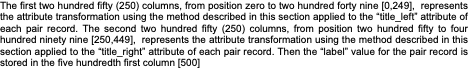

https://tfhub.dev/google/Wiki-words-250-with-normalization/2

**Preprocessed Data Set Outputs:**

* all_gsDataSetW2V_501


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 0.1 - Install whoosh
!pip install whoosh
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
#2020-08-17 Reading all_gs.jason using pd.read_json from My drive Google Drive

url = "/content/drive/My Drive/Python/Corpus/all_gs.json"

all_gsDataSet = pd.read_json(url,lines=True)

In [ ]:
print ("all_gsDataSet.shape")
print (all_gsDataSet.shape)
print ("all_gsDataSet.dtypes")
print (all_gsDataSet.dtypes)
print ("all_gsDataSet.isnull().sum()")
print (all_gsDataSet.isnull().sum())
all_gsDataSet = all_gsDataSet.reset_index(drop=True)

In [ ]:
all_gsDataSet

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the first argument (string)
# Returns 0 if any of the strings in the function arguments is None
# Version 1.1: 2020-04-10
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/len(x))))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1


# Calculates the Wiki-words-250-with-normalization matrix for two (2) pair attributes of a data set, and adds the label and stores them in a matrix [n,3].
# Returns the matrix with the calucalted Word2Vec result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Version 1.0: 2020-08-09

    

def W2V_1 (dset,
          left1,right1,
          label):
    rows=len(dset)
    #rows=1
    matrix1 = np.array(np.zeros(rows*3).reshape(rows,3),dtype=object)
    embed = hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")
    for i in range(rows):
        for j in range(3):
            if j == 0:
                matrix1[i,j] = embed([left1[i]])
            elif j == 1:
                matrix1[i,j] = embed([right1[i]])
            elif j == 2:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
all_gsDataSet.dtypes

In [ ]:
all_gsDataSet.isnull().sum()

In [ ]:
all_gsDataSet.shape

In [ ]:
# Initialize prepocess_dataset Word2Vec Matrix with 

all_gsDataSetW2V = W2V_1(all_gsDataSet,
                     all_gsDataSet.title_left,all_gsDataSet.title_right,
                     all_gsDataSet.label)
print ("all_gsDataSetW2V")
print (all_gsDataSetW2V)


In [ ]:
all_gsDataSetW2V.shape

In [ ]:
all_gsDataSetW2V[0,2]

In [ ]:
all_gsDataSet.label.loc[0]

In [ ]:
all_gsDataSetW2V[0,1]

In [ ]:
#TestDataSet10W2V save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/all_gsDataSetW2V', all_gsDataSetW2V)

In [ ]:
#TrainDataSetW2V load numpy array npy in binary format
all_gsDataSetW2V = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/all_gsDataSetW2V.npy',mmap_mode=None,allow_pickle=True)

In [ ]:
print (all_gsDataSetW2V.shape)
print (all_gsDataSetW2V.dtype)

In [ ]:
def w2vMatrix501 (npyArray):
  rows = len(npyArray[:])
  columns = len(npyArray[:][0])
  newMatrix = np.array(np.zeros(rows*501).reshape(rows,501))
  newMatrix.shape
  print ("rows=%s" %(rows))
  print ("columns=%s" %(columns))
  for i in range(rows):
    #print("i=%s" %(i))
    for j in range(columns):
      #print("j=%s" %(j))
      if j == 2:
        newMatrix[i,500] = npyArray[i,j]
        #print ("newMatrix[i,j]=%s" %(newMatrix[i,j]))
        #print ("npyArray[i,j]=%s" %(npyArray[i,j]))
      else:
        for k in range(250):
          #print("k=%s" %(k))
          if j == 1:
            k250=k+250
            #print("k250=%s" %(k250))
            newMatrix[i,k250] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k250]=%s" %(newMatrix[0,k250]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
          else:
            newMatrix[i,k] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k]=%s" %(newMatrix[0,k]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
  #print(newMatrix)
  return (newMatrix)

In [ ]:
all_gsDataSetW2V_501 = w2vMatrix501(all_gsDataSetW2V)
all_gsDataSetW2V_501.shape
all_gsDataSetW2V_501.dtype

In [ ]:
print (all_gsDataSetW2V_501.shape)
print (all_gsDataSetW2V_501.dtype)

In [ ]:
all_gsDataSetW2V[4399,2]

In [ ]:
all_gsDataSetW2V[4399,1][0,249]

In [ ]:
all_gsDataSetW2V_501[4399,500]

In [ ]:
#TrainDataSetW2V_501 save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/all_gsDataSetW2V_501', all_gsDataSetW2V_501)

# Preprocessing Data Corpus: Preprocessing of TrainDataSet.pkl to Create 90% Hyperparameter Training Data Set with Word2Vec v2
2020-11-07 JXHALLO: Preprocessing of TrainDataSet90.pkl with Word2Vec
v2: Applied transformation to create matrix (n,501) for word2vec transformation where:

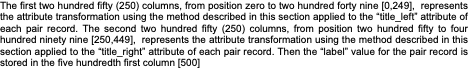

https://tfhub.dev/google/Wiki-words-250-with-normalization/2

**Preprocessed Data Set Outputs:**

* TrainDataSet90W2V_501

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 0.1 - Install whoosh
!pip install whoosh
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
#2020-08-09 Reading TestDataSet10 using pickle from My drive Google Drive
ValidationDataSet10=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10.pkl')

In [ ]:
ValidationDataSet10

In [ ]:
#2020-08-07 Reading TrainDataSet using pickle from My drive Google Drive
TrainDataSet=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet.pkl')

In [ ]:
print ("TrainDataSet.shape")
print (TrainDataSet.shape)
print ("TrainDataSet.dtypes")
print (TrainDataSet.dtypes)
print ("TrainDataSet.isnull().sum()")
print (TrainDataSet.isnull().sum())
TrainDataSet = TrainDataSet.reset_index(drop=True)

In [ ]:
print ("ValidationDataSet10.shape")
print (ValidationDataSet10.shape)
print ("ValidationDataSet10.dtypes")
print (ValidationDataSet10.dtypes)
print ("ValidationDataSet10.isnull().sum()")
print (ValidationDataSet10.isnull().sum())
ValidationDataSet10 = ValidationDataSet10.reset_index(drop=True)

In [ ]:
#2020-11-07 JXHALLO: Removing from TrainDataSet the ValidationDataSet10 records.
#TrainDataSet90 = pd.merge (TrainDataSet, ValidationDataSet10, how='outer', indicator=True)
cond = TrainDataSet['pair_id'].isin(ValidationDataSet10['pair_id'])
TrainDataSet.drop(TrainDataSet[cond].index, inplace = True)
TrainDataSet90 = TrainDataSet

In [ ]:
print ("TrainDataSet90.shape")
print (TrainDataSet90.shape)
print ("TrainDataSet90.dtypes")
print (TrainDataSet90.dtypes)
print ("TrainDataSet90.isnull().sum()")
print (TrainDataSet90.isnull().sum())
TrainDataSet90 = TrainDataSet90.reset_index(drop=True)

In [ ]:
#2020-11-07 Saving TrainDataSet90 using pickle from My drive Google Drive
TrainDataSet90.to_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90.pkl')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1


# Calculates the Wiki-words-250-with-normalization matrix for two (2) pair attributes of a data set, and adds the label and stores them in a matrix [n,3].
# Returns the matrix with the calucalted Word2Vec result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Version 1.0: 2020-08-09

    

def W2V_1 (dset,
          left1,right1,
          label):
    rows=len(dset)
    #rows=1
    matrix1 = np.array(np.zeros(rows*3).reshape(rows,3),dtype=object)
    embed = hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")
    for i in range(rows):
        for j in range(3):
            if j == 0:
                matrix1[i,j] = embed([left1[i]])
            elif j == 1:
                matrix1[i,j] = embed([right1[i]])
            elif j == 2:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
TrainDataSet90.dtypes

In [ ]:
TrainDataSet90.isnull().sum()

In [ ]:
TrainDataSet90.shape

In [ ]:
# Initialize prepocess_dataset Word2Vec Matrix with 

TrainDataSet90W2V = W2V_1(TrainDataSet90,
                     TrainDataSet90.title_left,TrainDataSet90.title_right,
                     TrainDataSet90.label)
print ("TrainDataSet90")
print (TrainDataSet90)


In [ ]:
TrainDataSet90W2V.shape

In [ ]:
TrainDataSet90W2V[0,2]

In [ ]:
TrainDataSet90W2V.label.loc[0]

In [ ]:
TrainDataSet90W2V[0,1]

In [ ]:
#TestDataSet10W2V save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90W2V', TrainDataSet90W2V)

In [ ]:
#TestDataSet10W2V load numpy array npy in binary format
TrainDataSet90W2V = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90W2V.npy',mmap_mode=None,allow_pickle=True)

In [ ]:
a = TrainDataSet90W2V[0]
-5.41110002e-02

In [ ]:
row_count = len(TrainDataSet90W2V[:])
col_count = len(TrainDataSet90W2V[:][0])
print ("Row_Count:%d   Col_Count:%d " %(row_count,col_count))

row_count = len(a[:])
col_count = len(a[:][0])
print ("Row_Count:%d   Col_Count:%d " %(row_count,col_count))

In [ ]:
a = a.reshape(1,3)
row_count = len(a[:])
col_count = len(a[:][0])
print ("Row_Count:%d   Col_Count:%d " %(row_count,col_count))

In [ ]:
a[0,0][0,0]

In [ ]:
b [0,4]

In [ ]:
a.shape

In [ ]:
b = np.array(np.zeros(1*501).reshape(1,501))
b[0,0] = TrainDataSet90W2V[0][0][0][0]
b[0,0]

In [ ]:
b = np.array(np.zeros(1*501).reshape(1,501))
b.shape

In [ ]:
rows = len(TrainDataSet90W2V[:])
columns = len(TrainDataSet90W2V[:][0])
b = np.array(np.zeros(rows*501).reshape(rows,501))
b.shape
print ("rows=%s" %(rows))
print ("columns=%s" %(columns))
for i in range(rows):
  print("i=%s" %(i))
  for j in range(columns):
    print("j=%s" %(j))
    if j == 2:
      b[i,j] = ValidationDataSet10W2V[i,j]
      print ("b[i,j]=%s" %(b[i,j]))
      print ("ValidationDataSet10W2V[i,j]=%s" %(ValidationDataSet10W2V[i,j]))
    else:
      for k in range(250):
        print("k=%s" %(k))
        b[i,k] = ValidationDataSet10W2V[i,j][0,k]
        print ("b[i,k]=%s" %(b[0,k]))
        print ("ValidationDataSet10W2V[i,j][0,k]=%s" %(ValidationDataSet10W2V[i,j][0,k]))
print(b)
 


In [ ]:
def w2vMatrix501 (npyArray):
  rows = len(npyArray[:])
  columns = len(npyArray[:][0])
  newMatrix = np.array(np.zeros(rows*501).reshape(rows,501))
  newMatrix.shape
  print ("rows=%s" %(rows))
  print ("columns=%s" %(columns))
  for i in range(rows):
    #print("i=%s" %(i))
    for j in range(columns):
      #print("j=%s" %(j))
      if j == 2:
        newMatrix[i,500] = npyArray[i,j]
        #print ("newMatrix[i,j]=%s" %(newMatrix[i,j]))
        #print ("npyArray[i,j]=%s" %(npyArray[i,j]))
      else:
        for k in range(250):
          #print("k=%s" %(k))
          if j == 1:
            k250=k+250
            #print("k250=%s" %(k250))
            newMatrix[i,k250] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k250]=%s" %(newMatrix[0,k250]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
          else:
            newMatrix[i,k] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k]=%s" %(newMatrix[0,k]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
  #print(newMatrix)
  return (newMatrix)

In [ ]:
TrainDataSet90W2V_501 = w2vMatrix501(TrainDataSet90W2V)
TrainDataSet90W2V_501.shape
TrainDataSet90W2V_501.dtype

In [ ]:
print (TrainDataSet90W2V_501.shape)
print (TrainDataSet90W2V_501.dtype)

In [ ]:
TrainDataSet90W2V[3544,2]

In [ ]:
TrainDataSet90W2V[3544,1][0,249]

In [ ]:
TrainDataSet90W2V_501[3544,500]

In [ ]:
#TestDataSet10W2V_501 save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90W2V_501', TrainDataSet90W2V_501)

#Preprocessing of ValidationDataSet10.pkl with Word2Vec v2 to Create 10% Hyperparameter Validation Data Set with Word2Vec v2

2020-10-23 JXHALLO: Applied transformation to create matrix (n,501) for word2vec transformation where:

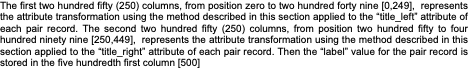

https://tfhub.dev/google/Wiki-words-250-with-normalization/2

**Preprocessed Data Set Outputs:**

* ValidationDataSet10W2V_501

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 0.1 - Install whoosh
!pip install whoosh
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
#2020-08-09 Reading TestDataSet10 using pickle from My drive Google Drive
ValidationDataSet10=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10.pkl')

In [ ]:
ValidationDataSet10

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1


# Calculates the Wiki-words-250-with-normalization matrix for two (2) pair attributes of a data set, and adds the label and stores them in a matrix [n,3].
# Returns the matrix with the calucalted Word2Vec result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Version 1.0: 2020-08-09

    

def W2V_1 (dset,
          left1,right1,
          label):
    rows=len(dset)
    #rows=1
    matrix1 = np.array(np.zeros(rows*3).reshape(rows,3),dtype=object)
    embed = hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")
    for i in range(rows):
        for j in range(3):
            if j == 0:
                matrix1[i,j] = embed([left1[i]])
            elif j == 1:
                matrix1[i,j] = embed([right1[i]])
            elif j == 2:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
ValidationDataSet10.dtypes

In [ ]:
ValidationDataSet10.isnull().sum()

In [ ]:
ValidationDataSet10.shape

In [ ]:
# Initialize prepocess_dataset Word2Vec Matrix with 

ValidationDataSet10W2V = W2V_1(ValidationDataSet10,
                     ValidationDataSet10.title_left,ValidationDataSet10.title_right,
                     ValidationDataSet10.label)
print ("ValidationDataSet10")
print (ValidationDataSet10)


In [ ]:
ValidationDataSet10W2V.shape

In [ ]:
ValidationDataSet10W2V[0,2]

In [ ]:
ValidationDataSet10.label.loc[0]

In [ ]:
ValidationDataSet10W2V[0,1]

In [ ]:
#TestDataSet10W2V save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10W2V', ValidationDataSet10W2V)

In [ ]:
#TestDataSet10W2V load numpy array npy in binary format
ValidationDataSet10W2V = np.load('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10W2V.npy',mmap_mode=None,allow_pickle=True)

In [ ]:
a = ValidationDataSet10W2V[0]
-5.41110002e-02

In [ ]:
row_count = len(ValidationDataSet10W2V[:])
col_count = len(ValidationDataSet10W2V[:][0])
print ("Row_Count:%d   Col_Count:%d " %(row_count,col_count))

row_count = len(a[:])
col_count = len(a[:][0])
print ("Row_Count:%d   Col_Count:%d " %(row_count,col_count))

In [ ]:
a = a.reshape(1,3)
row_count = len(a[:])
col_count = len(a[:][0])
print ("Row_Count:%d   Col_Count:%d " %(row_count,col_count))

In [ ]:
a[0,0][0,0]

In [ ]:
b [0,4]

In [ ]:
a.shape

(1, 3)

In [ ]:
b = np.array(np.zeros(1*501).reshape(1,501))
b[0,0] = ValidationDataSet10W2V[0][0][0][0]
b[0,0]

In [ ]:
b = np.array(np.zeros(1*501).reshape(1,501))
b.shape

In [ ]:
rows = len(ValidationDataSet10W2V[:])
columns = len(ValidationDataSet10W2V[:][0])
b = np.array(np.zeros(rows*501).reshape(rows,501))
b.shape
print ("rows=%s" %(rows))
print ("columns=%s" %(columns))
for i in range(rows):
  print("i=%s" %(i))
  for j in range(columns):
    print("j=%s" %(j))
    if j == 2:
      b[i,j] = ValidationDataSet10W2V[i,j]
      print ("b[i,j]=%s" %(b[i,j]))
      print ("ValidationDataSet10W2V[i,j]=%s" %(ValidationDataSet10W2V[i,j]))
    else:
      for k in range(250):
        print("k=%s" %(k))
        b[i,k] = ValidationDataSet10W2V[i,j][0,k]
        print ("b[i,k]=%s" %(b[0,k]))
        print ("ValidationDataSet10W2V[i,j][0,k]=%s" %(ValidationDataSet10W2V[i,j][0,k]))
print(b)
 


In [ ]:
def w2vMatrix501 (npyArray):
  rows = len(npyArray[:])
  columns = len(npyArray[:][0])
  newMatrix = np.array(np.zeros(rows*501).reshape(rows,501))
  newMatrix.shape
  print ("rows=%s" %(rows))
  print ("columns=%s" %(columns))
  for i in range(rows):
    #print("i=%s" %(i))
    for j in range(columns):
      #print("j=%s" %(j))
      if j == 2:
        newMatrix[i,500] = npyArray[i,j]
        #print ("newMatrix[i,j]=%s" %(newMatrix[i,j]))
        #print ("npyArray[i,j]=%s" %(npyArray[i,j]))
      else:
        for k in range(250):
          #print("k=%s" %(k))
          if j == 1:
            k250=k+250
            #print("k250=%s" %(k250))
            newMatrix[i,k250] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k250]=%s" %(newMatrix[0,k250]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
          else:
            newMatrix[i,k] = npyArray[i,j][0,k]
            #print ("newMatrix[i,k]=%s" %(newMatrix[0,k]))
            #print ("npyArray[i,j][0,k]=%s" %(npyArray[i,j][0,k]))
  #print(newMatrix)
  return (newMatrix)

In [ ]:
ValidationDataSet10W2V_501 = w2vMatrix501(ValidationDataSet10W2V)
ValidationDataSet10W2V_501.shape
ValidationDataSet10W2V_501.dtype

In [ ]:
print (ValidationDataSet10W2V_501.shape)
print (ValidationDataSet10W2V_501.dtype)

In [ ]:
ValidationDataSet10W2V[3544,2]

In [ ]:
ValidationDataSet10W2V[3544,1][0,249]

In [ ]:
ValidationDataSet10W2V_501[3544,500]

In [ ]:
#TestDataSet10W2V_501 save as numpy array npy in binary format
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10W2V_501', ValidationDataSet10W2V_501)

# ***Preprocessing Data Corpus***

DL Similarity Matrix Data Processing

#Preprocessing of TrainDataSet.pkl with DL Similarity Matrix
2020-10-23 JXHALLO: Re Preprocesing DL TrainingDataSet
Adjusting DL Function to use max len of strings as denominator in order to ensure DL returns a number between [0,1]

**Preprocessed Data Set Outputs:**

* TrainDataSetDL

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
# 3.1 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
x = 'JULIO'
y = 'HALLOLARREA'
lenx = len(x)
print (lenx)
leny = len(y)
print (len(y))
z = max ((len(x)),(len(y)))
print (z)

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#2020-07-20 Reading AppendedDataFile using pickle
#TestDataSet=pd.read_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/TestDataSet.pkl')
import io

TestDataSet=pd.read_pickle(io.BytesIO(uploaded['TestDataSet.pkl']))

In [ ]:
TestDataSet=pd.DataFrame(None)
print ("TestDataSet.shape")
print (TestDataSet.shape)

In [ ]:
#2020-08-07 Reading TrainDataSet using pickle from My drive Google Drive
TrainDataSet=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet.pkl')

In [ ]:
print ("TrainDataSet.shape")
print (TrainDataSet.shape)
print ("TrainDataSet.dtypes")
print (TrainDataSet.dtypes)
print ("TrainDataSet.isnull().sum()")
print (TrainDataSet.isnull().sum())
TrainDataSet = TrainDataSet.reset_index(drop=True)

In [ ]:
# 4.1- JXHALLO Preprocess Data Corpus to dataFileAll

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Will just create a [n,24] dataframe

data2 = dataFileAll(TrainDataSet)
print (data2.shape)
print (data2.dtypes)
print (data2.isnull().sum())

In [ ]:
# Initialize prepocess_dataset DL Similarity Matrix 

TrainDataSetDL = DLM1(data2,
                     data2.brandListLeft,data2.brandListRight,
                     data2.categoryListLeft,data2.categoryListRight,
                     data2.descriptionListLeft,data2.descriptionListRight,
                     data2.titleListLeft,data2.titleListRight,
                     data2.gtin8ListLeft,data2.gtin8ListRight,
                     data2.gtin12ListLeft,data2.gtin12ListRight,
                     data2.gtin13ListLeft,data2.gtin13ListRight,
                     data2.gtin14ListLeft,data2.gtin14ListRight,
                     data2.mpnListLeft,data2.mpnListRight,
                     data2.skuListLeft,data2.skuListRight,
                     data2.labelList)
print ("TrainDataSetDL")
print (TrainDataSetDL)

In [ ]:
TrainDataSetDL[35563]

In [ ]:
print (data2.labelList[35563])
print (data2.categoryListLeft[35563])
print (data2.categoryListRight[35563])
print (DL(data2.categoryListLeft[35563],data2.categoryListRight[35563]))

In [ ]:
print (data2.shape)

In [ ]:

print (data2.dtypes)


In [ ]:

print (data2.isnull().sum())

In [ ]:
#numpy.save(file, arr, allow_pickle=True, fix_imports=True)[source]

np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSetDL', TrainDataSetDL)


#Preprocessing of TestDataSet10.pkl with DL Similarity Matrix
2020-10-23 JXHALLO: Re Preprocesing DL TestDataSet
Adjusting DL Function to use max len of strings as denominator in order to ensure DL returns a number between [0,1]

**Preprocessed Data Set Outputs:**

* TestDataSetDL

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
# 3.1 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#2020-07-20 Reading AppendedDataFile using pickle
#TestDataSet=pd.read_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/TestDataSet.pkl')
import io

TestDataSet=pd.read_pickle(io.BytesIO(uploaded['TestDataSet.pkl']))

In [ ]:
TestDataSet=pd.DataFrame(None)
print ("TestDataSet.shape")
print (TestDataSet.shape)

In [ ]:
#2020-08-07 Reading AppendedDataFile using pickle from My drive Google Drive
TestDataSet=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/TestDataSet.pkl')

In [ ]:
print ("TestDataSet.shape")
print (TestDataSet.shape)
print ("TestDataSet.dtypes")
print (TestDataSet.dtypes)
print ("TestDataSet.isnull().sum()")
print (TestDataSet.isnull().sum())
TestDataSet = TestDataSet.reset_index(drop=True)

In [ ]:
# 4.1- JXHALLO Preprocess Data Corpus to dataFileAll

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Will just create a [n,24] dataframe

data2 = dataFileAll(TestDataSet)
print (data2.shape)
print (data2.dtypes)
print (data2.isnull().sum())

In [ ]:
# Initialize prepocess_dataset DL Similarity Matrix 

TestDataSetDL2 = DLM1(data2,
                     data2.brandListLeft,data2.brandListRight,
                     data2.categoryListLeft,data2.categoryListRight,
                     data2.descriptionListLeft,data2.descriptionListRight,
                     data2.titleListLeft,data2.titleListRight,
                     data2.gtin8ListLeft,data2.gtin8ListRight,
                     data2.gtin12ListLeft,data2.gtin12ListRight,
                     data2.gtin13ListLeft,data2.gtin13ListRight,
                     data2.gtin14ListLeft,data2.gtin14ListRight,
                     data2.mpnListLeft,data2.mpnListRight,
                     data2.skuListLeft,data2.skuListRight,
                     data2.labelList)
print ("TestDataSetDL2")
print (TestDataSetDL2)

In [ ]:
TestDataSetDL = TestDataSetDL2

In [ ]:
print ("TestDataSetDL")
print (TestDataSetDL)

In [ ]:
TestDataSetDL[0]

In [ ]:
print (data2.labelList[0])
print (data2.categoryListLeft[0])
print (data2.categoryListRight[0])
print (DL(data2.categoryListLeft[0],data2.categoryListRight[0]))

In [ ]:
print (data2.labelList[0])
print (data2.descriptionListLeft[0])
print (data2.descriptionListRight[0])
print (DL(data2.descriptionListLeft[0],data2.descriptionListRight[0]))


In [ ]:
print (len(data2.descriptionListLeft[0]))
print (len(data2.descriptionListRight[0]))
print (damerau_levenshtein (data2.descriptionListLeft[0],data2.descriptionListRight[0]))
print ((damerau_levenshtein (data2.descriptionListLeft[0],data2.descriptionListRight[0]))/(len(data2.descriptionListRight[0])))

In [ ]:
#numpy.save(file, arr, allow_pickle=True, fix_imports=True)[source]
#TestDataSet10DL = asarray (TestDataSet10DL)
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/TestDataSetDL', TestDataSetDL)


#Preprocessing of all_gsDataSet with DL Similarity Matrix
2020-10-23 JXHALLO: Re Preprocesing DL all_gsDataSet
Adjusting DL Function to use max len of strings as denominator in order to ensure DL returns a number between [0,1]

**Preprocessed Data Set Outputs:**

* all_gsDataSetDL

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
# 3.1 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#2020-07-20 Reading AppendedDataFile using pickle
#TestDataSet=pd.read_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/TestDataSet.pkl')
import io

TestDataSet=pd.read_pickle(io.BytesIO(uploaded['TestDataSet.pkl']))

In [ ]:
TestDataSet=pd.DataFrame(None)
print ("TestDataSet.shape")
print (TestDataSet.shape)

In [ ]:
#2020-08-17 Reading all_gs using pickle from My drive Google Drive
#all_gsDataSet=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet.pkl')

url = "/content/drive/My Drive/Python/Corpus/all_gs.json"

all_gsDataSet = pd.read_json(url,lines=True)

In [ ]:
print ("all_gsDataSet.shape")
print (all_gsDataSet.shape)
print ("all_gsDataSet.dtypes")
print (all_gsDataSet.dtypes)
print ("all_gsDataSet.isnull().sum()")
print (all_gsDataSet.isnull().sum())
all_gsDataSet = all_gsDataSet.reset_index(drop=True)

In [ ]:
# 4.1- JXHALLO Preprocess Data Corpus to dataFileAll

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Will just create a [n,24] dataframe

data2 = dataFileAll(all_gsDataSet)
print (data2.shape)
print (data2.dtypes)
print (data2.isnull().sum())

In [ ]:
# Initialize prepocess_dataset DL Similarity Matrix 

all_gsDataSetDL = DLM1(data2,
                     data2.brandListLeft,data2.brandListRight,
                     data2.categoryListLeft,data2.categoryListRight,
                     data2.descriptionListLeft,data2.descriptionListRight,
                     data2.titleListLeft,data2.titleListRight,
                     data2.gtin8ListLeft,data2.gtin8ListRight,
                     data2.gtin12ListLeft,data2.gtin12ListRight,
                     data2.gtin13ListLeft,data2.gtin13ListRight,
                     data2.gtin14ListLeft,data2.gtin14ListRight,
                     data2.mpnListLeft,data2.mpnListRight,
                     data2.skuListLeft,data2.skuListRight,
                     data2.labelList)
print ("all_gsDataSetDL")
print (all_gsDataSetDL)

In [ ]:
all_gsDataSetDL[4399]

In [ ]:
print (data2.labelList[0])
print (data2.categoryListLeft[0])
print (data2.categoryListRight[0])
print (DL(data2.categoryListLeft[0],data2.categoryListRight[0]))

In [ ]:
print (data2.shape)

In [ ]:

print (data2.dtypes)


In [ ]:

print (data2.isnull().sum())

In [ ]:
#numpy.save(file, arr, allow_pickle=True, fix_imports=True)[source]

np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/all_gsDataSetDL', all_gsDataSetDL)


In [ ]:
all_gsDataSetDL[0]


In [ ]:
all_gsDataSetDL.shape

# Preprocessing Data Corpus: Preprocessing of TrainDataSet.pkl to Create 90% Hyperparameter Training Data Set with DL Similarity Matrix
2020-11-07 JXHALLO: Re Preprocesing DL TrainingDataSet
Adjusting DL Function to use max len of strings as denominator in order to ensure DL returns a number between [0,1]
Removing from train data set the validation data set records (10%) to have a clean 90%


**Preprocessed Data Set Outputs:**

* TrainDataSet90DL

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

In [ ]:
# 3.1 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#2020-07-20 Reading AppendedDataFile using pickle
#TestDataSet=pd.read_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/TestDataSet.pkl')
import io

TestDataSet=pd.read_pickle(io.BytesIO(uploaded['TestDataSet.pkl']))

In [ ]:
TestDataSet=pd.DataFrame(None)
print ("TestDataSet.shape")
print (TestDataSet.shape)

In [ ]:
#2020-08-07 Reading TrainDataSet using pickle from My drive Google Drive
TrainDataSet=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet.pkl')

In [ ]:
#2020-08-07 Reading AppendedDataFile using pickle from My drive Google Drive
TrainDataSet90=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90.pkl')

In [ ]:
#2020-11-07 Reading TrainDataSet90 using pickle from My drive Google Drive
ValidationDataSet10=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10.pkl')

In [ ]:
print ("TrainDataSet.shape")
print (TrainDataSet.shape)
print ("TrainDataSet.dtypes")
print (TrainDataSet.dtypes)
print ("TrainDataSet.isnull().sum()")
print (TrainDataSet.isnull().sum())
TrainDataSet = TrainDataSet.reset_index(drop=True)

In [ ]:
print ("ValidationDataSet10.shape")
print (ValidationDataSet10.shape)
print ("ValidationDataSet10.dtypes")
print (ValidationDataSet10.dtypes)
print ("ValidationDataSet10.isnull().sum()")
print (ValidationDataSet10.isnull().sum())
ValidationDataSet10 = ValidationDataSet10.reset_index(drop=True)

In [ ]:
#2020-11-07 JXHALLO: Removing from TrainDataSet the ValidationDataSet10 records.
#TrainDataSet90 = pd.merge (TrainDataSet, ValidationDataSet10, how='outer', indicator=True)
cond = TrainDataSet['pair_id'].isin(ValidationDataSet10['pair_id'])
TrainDataSet.drop(TrainDataSet[cond].index, inplace = True)
TrainDataSet90 = TrainDataSet

In [ ]:
print ("TrainDataSet90.shape")
print (TrainDataSet90.shape)
print ("TrainDataSet90.dtypes")
print (TrainDataSet90.dtypes)
print ("TrainDataSet90.isnull().sum()")
print (TrainDataSet90.isnull().sum())
TrainDataSet90 = TrainDataSet90.reset_index(drop=True)

In [ ]:
# 4.1- JXHALLO Preprocess Data Corpus to dataFileAll

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Will just create a [n,24] dataframe

data2 = dataFileAll(TrainDataSet90)
print (data2.shape)
print (data2.dtypes)
print (data2.isnull().sum())

In [ ]:
# Initialize prepocess_dataset DL Similarity Matrix 

TrainDataSet90DL = DLM1(data2,
                     data2.brandListLeft,data2.brandListRight,
                     data2.categoryListLeft,data2.categoryListRight,
                     data2.descriptionListLeft,data2.descriptionListRight,
                     data2.titleListLeft,data2.titleListRight,
                     data2.gtin8ListLeft,data2.gtin8ListRight,
                     data2.gtin12ListLeft,data2.gtin12ListRight,
                     data2.gtin13ListLeft,data2.gtin13ListRight,
                     data2.gtin14ListLeft,data2.gtin14ListRight,
                     data2.mpnListLeft,data2.mpnListRight,
                     data2.skuListLeft,data2.skuListRight,
                     data2.labelList)
print ("TrainDataSet90DL")
print (TrainDataSet90DL)

In [ ]:
TrainDataSet90DL[35563]

In [ ]:
print (data2.labelList[35563])
print (data2.categoryListLeft[35563])
print (data2.categoryListRight[35563])
print (DL(data2.categoryListLeft[35563],data2.categoryListRight[35563]))

In [ ]:
print (data2.shape)

In [ ]:

print (data2.dtypes)


In [ ]:

print (data2.isnull().sum())

In [ ]:
#numpy.save(file, arr, allow_pickle=True, fix_imports=True)[source]

np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/TrainDataSet90DL', TrainDataSet90DL)


In [ ]:
TrainDataSet90DL[0]


In [ ]:
TrainDataSet90DL.shape

# Preprocessing Data Corpus: Preprocessing of TrainDataSet.pkl to Create 10% Hyperparameter Validation Data Set with DL Similarity Matrix
2020-11-07 JXHALLO: Re Preprocesing DL TrainingDataSet
Adjusting DL Function to use max len of strings as denominator in order to ensure DL returns a number between [0,1]
Removing from train data set the train data set records (90%) to have a clean 10%


**Preprocessed Data Set Outputs:**

* ValidationDataSet10DL

In [ ]:
# 0.1 - Import Python Libraries
!pip install whoosh

In [ ]:
# 1- Import Python Libraries
import numpy as np
import gensim as gs
import re as re
import string as st
import codecs as co
import glob as gl
import logging as logger
import multiprocessing as mult
import os as os
import pprint as pp
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import whoosh as ws
import random as ra
import csv as csv
import scipy as sc
import json as js
import itertools 

In [ ]:
# 2- Import Python Functions
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.support.levenshtein import levenshtein
from whoosh.support.levenshtein import damerau_levenshtein
from IPython.display import clear_output
from six.moves import urllib
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# 3- Import Python tensorflow library
import tensorflow as tf
print(tf.version)  # make sure the version is 2.x
import tensorflow_hub as hub
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow.compat.v2.feature_column as fc

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
# 3.1 - Importing drive from google.colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 3- JXHALLO Personal Functions for Code

# String Normalizer
# Version 1.0: 2020-04-10
# Returns normalized string without spaces and special characters using RegEx. Then sets lower case

def norm (x):
    return re.sub(r"\s|[^a-z0-9]","",x.lower(), flags=re.IGNORECASE)

# String Exact Comparison
# Version 1.0: 2020-04-10
# Returns boolean if string comparison is exact.

def exact(a,b):
    if a is b:
        return 1
    else:
        return 0

# Function to access a specific value within an object list
# Returns the value of the record with the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.2: 2020-04-17

def multiObjects(values,key):
    val = None
    for i in range(len(values)):
        data = values[i]
        for (k, v) in data.items():
            if k == key:
                val = list(v.split(", "))[0].replace("[","").replace("]","").strip()
    return val
    
# Function to access a specific value within an object list
# Returns the value of the record of the corresponding key.
# Arguments: object that contain the list of keys and values, the key that you want to match to return the value
# Special Note: This function will only return the first value of the list.
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.0: 2020-04-24

def identifiersList (column,key):
    lineLst = []
    for i in range (len(column)):
        mpn = multiObjects(column[i],key)
        lineLst.append(mpn)
    return lineLst
    
# Damerau–Levenshtein distance similarity function for normalized strings. Caluculates the Damerau–Levenshtein distance between two strings
# Then caluclates the similarity dividing the Damerau–Levenshtein distance over the length of the argument (string) with max length
# Returns 0 if any of the strings in the function arguments is None
# Version 1.2: 2020-10-23
# Returns Damerau–Levenshtein distance similarity [0-1]

def DL (x,y):
    if x is None or y is None:
        return 0
    else:
        x = norm (x)
        y = norm (y)
        z = max((len(x)),(len(y)))
        #return (1-(damerau_levenshtein (x,y)/len(x)))
        return abs((1-(damerau_levenshtein (x,y)/z)))
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the label and stores them in a matrix [n,11] where n,11 is the label to identify if the reord is duplicated
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM1 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          label):
    rows=len(dset)
    #matrix1 = np.array(np.zeros(rows*11).reshape(rows,11),dtype=object)
    matrix1 = np.zeros(rows*11).reshape(rows,11)
    for i in range(rows):
      if i % 10000 == 0:
        print ('row number= ')
        print (i)
      for j in range(11):
            if i % 10000 == 0:
                print ('column number= ')
                print (j)
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM2 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          left6,right6,
          left7,right7,
          left8,right8,
          left9,right9,
          left10,right10,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL(left5[i],right5[i])
            elif j == 5:
                matrix1[i,j] = DL(left6[i],right6[i])
            elif j == 6:
                matrix1[i,j] = DL(left7[i],right7[i])
            elif j == 7:
                matrix1[i,j] = DL(left8[i],right8[i])
            elif j == 8:
                matrix1[i,j] = DL(left9[i],right9[i])
            elif j == 9:
                matrix1[i,j] = DL(left10[i],right10[i])
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1
    
    
# Calculates the DL for ten (10) pair attributes of a data set, and adds the pair_id and label and stores them in a matrix [n,12] where n,12 is the BIAS is the number of records
# Returns the matrix with the calucalted DL result for each pair of attributes.
# Special Note: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Version 1.3: 2020-04-25

    

def DLM3 (dset,
          left1,right1,
          left2,right2,
          left3,right3,
          left4,right4,
          left5,right5,
          key1,
          key2,
          key3,
          key4,
          key5,
          key6,
          pair_id,
          label):
    rows=len(dset)
    matrix1 = np.zeros(rows*12).reshape(rows,12)
    for i in range(rows):
        for j in range(12):
            if j == 0:
                matrix1[i,j] = DL(left1[i],right1[i])
            elif j == 1:
                matrix1[i,j] = DL(left2[i],right2[i])
            elif j == 2:
                matrix1[i,j] = DL(left3[i],right3[i])
            elif j == 3:
                matrix1[i,j] = DL(left4[i],right4[i])
            elif j == 4:
                matrix1[i,j] = DL((multiObjects(left5[i],key1)),(multiObjects(right5[i],key1)))
            elif j == 5:
                matrix1[i,j] = DL((multiObjects(left5[i],key2)),(multiObjects(right5[i],key2)))
            elif j == 6:
                matrix1[i,j] = DL((multiObjects(left5[i],key3)),(multiObjects(right5[i],key3)))
            elif j == 7:
                matrix1[i,j] = DL((multiObjects(left5[i],key4)),(multiObjects(right5[i],key4)))
            elif j == 8:
                matrix1[i,j] = DL((multiObjects(left5[i],key5)),(multiObjects(right5[i],key5)))
            elif j == 9:
                matrix1[i,j] = DL((multiObjects(left5[i],key6)),(multiObjects(right5[i],key6)))
            elif j == 10:
                matrix1[i,j] = pair_id[i]
            elif j == 11:
                matrix1[i,j] = label[i]
                
    return matrix1

# Function to create a new Data Frame with selected columns of a data set.
# Returns the new data frame / data set with all the required columns of tuple.
# Arguments: Data Set
# Special Note: This function will only return as part of the new data frame:
# Special Note2: This function has been designed specifically for the data sets of the Corpus: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# For the data sets: XX_train_[size].json, XX_js.json and its respective sample data sets.
# Will bring data from: "right" and "left" dat set tuple
# Version 1.0: 2020-04-24


def dataFileAll (df1):
    idLeft = df1.id_left
    idRight = df1.id_right
    brandListLeft = df1.brand_left
    brandListRight = df1.brand_right
    categoryListLeft = df1.category_left
    categoryListRight = df1.category_right
    descriptionListLeft = df1.description_left
    descriptionListRight = df1.description_right
    titleListLeft = df1.title_left
    titleListRight = df1.title_right
    gtin8ListLeft = identifiersList(df1.identifiers_left,"/gtin8")
    gtin8ListRight = identifiersList(df1.identifiers_right,"/gtin8")
    gtin12ListLeft = identifiersList(df1.identifiers_left,"/gtin12")
    gtin12ListRight = identifiersList(df1.identifiers_right,"/gtin12")
    gtin13ListLeft = identifiersList(df1.identifiers_left,"/gtin13")
    gtin13ListRight = identifiersList(df1.identifiers_right,"/gtin13")
    gtin14ListLeft = identifiersList(df1.identifiers_left,"/gtin14")
    gtin14ListRight = identifiersList(df1.identifiers_right,"/gtin14")
    mpnListLeft = identifiersList(df1.identifiers_left,"/mpn")
    mpnListRight = identifiersList(df1.identifiers_right,"/mpn")
    skuListLeft = identifiersList(df1.identifiers_left,"/sku")
    skuListRight = identifiersList(df1.identifiers_right,"/sku")
    pairIdList = df1.pair_id
    labelList = df1.label
    
    
    zipList = list(zip(idLeft
                       ,idRight
                       ,brandListLeft
                       ,brandListRight
                       ,categoryListLeft
                       ,categoryListRight
                       ,descriptionListLeft
                       ,descriptionListRight
                       ,titleListLeft
                       ,titleListRight
                       ,gtin8ListLeft
                       ,gtin8ListRight
                       ,gtin12ListLeft
                       ,gtin12ListRight
                       ,gtin13ListLeft
                       ,gtin13ListRight
                       ,gtin14ListLeft
                       ,gtin14ListRight
                       ,mpnListLeft
                       ,mpnListRight
                       ,skuListLeft
                       ,skuListRight
                       ,pairIdList
                       ,labelList
                      )
                  )
    dataObjectLeft = pd.DataFrame(zipList ,columns = ["idLeft"
                       ,"idRight"
                       ,"brandListLeft"
                       ,"brandListRight"
                       ,"categoryListLeft"
                       ,"categoryListRight"
                       ,"descriptionListLeft"
                       ,"descriptionListRight"
                       ,"titleListLeft"
                       ,"titleListRight"
                       ,"gtin8ListLeft"
                       ,"gtin8ListRight"
                       ,"gtin12ListLeft"
                       ,"gtin12ListRight"
                       ,"gtin13ListLeft"
                       ,"gtin13ListRight"
                       ,"gtin14ListLeft"
                       ,"gtin14ListRight"
                       ,"mpnListLeft"
                       ,"mpnListRight"
                       ,"skuListLeft"
                       ,"skuListRight"
                       ,"pairIdList"
                       ,"labelList"])

    return dataObjectLeft

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#2020-07-20 Reading AppendedDataFile using pickle
#TestDataSet=pd.read_pickle('/Users/juliohallo/Documents/Personal/Maestria 2018/Python/20200720_DataAnalysis/TestDataSet.pkl')
import io

ValidationDataSet10=pd.read_pickle(io.BytesIO(uploaded['ValidationDataSet10.pkl']))

In [ ]:
ValidationDataSet10=pd.DataFrame(None)
print ("ValidationDataSet10.shape")
print (ValidationDataSet10.shape)

In [ ]:
#2020-08-07 Reading AppendedDataFile using pickle from My drive Google Drive
ValidationDataSet10=pd.read_pickle('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10.pkl')

In [ ]:
print ("ValidationDataSet10.shape")
print (ValidationDataSet10.shape)
print ("ValidationDataSet10.dtypes")
print (ValidationDataSet10.dtypes)
print ("ValidationDataSet10.isnull().sum()")
print (ValidationDataSet10.isnull().sum())
ValidationDataSet10 = ValidationDataSet10.reset_index(drop=True)

In [ ]:
# 4.1- JXHALLO Preprocess Data Corpus to dataFileAll

# all_train_xlarge_sample.json
# Complete Data Catalog available at: http://data.dws.informatik.uni-mannheim.de/largescaleproductcorpus/data/v2/
# Data Corpus Explanation available at: http://webdatacommons.org/largescaleproductcorpus/v2/index.html
# Will just create a [n,24] dataframe

data2 = dataFileAll(ValidationDataSet10)
print (data2.shape)
print (data2.dtypes)
print (data2.isnull().sum())

In [ ]:
# Initialize prepocess_dataset DL Similarity Matrix 

ValidationDataSet10DL2 = DLM1(data2,
                     data2.brandListLeft,data2.brandListRight,
                     data2.categoryListLeft,data2.categoryListRight,
                     data2.descriptionListLeft,data2.descriptionListRight,
                     data2.titleListLeft,data2.titleListRight,
                     data2.gtin8ListLeft,data2.gtin8ListRight,
                     data2.gtin12ListLeft,data2.gtin12ListRight,
                     data2.gtin13ListLeft,data2.gtin13ListRight,
                     data2.gtin14ListLeft,data2.gtin14ListRight,
                     data2.mpnListLeft,data2.mpnListRight,
                     data2.skuListLeft,data2.skuListRight,
                     data2.labelList)
print ("ValidationDataSet10DL2")
print (ValidationDataSet10DL2)

In [ ]:
ValidationDataSet10DL = ValidationDataSet10DL2

In [ ]:
print ("ValidationDataSet10DL")
print (ValidationDataSet10DL)

In [ ]:
ValidationDataSet10DL[0]

In [ ]:
print (data2.labelList[0])
print (data2.categoryListLeft[0])
print (data2.categoryListRight[0])
print (DL(data2.categoryListLeft[0],data2.categoryListRight[0]))

In [ ]:
print (data2.labelList[0])
print (data2.descriptionListLeft[0])
print (data2.descriptionListRight[0])
print (DL(data2.descriptionListLeft[0],data2.descriptionListRight[0]))


In [ ]:
print (len(data2.descriptionListLeft[0]))
print (len(data2.descriptionListRight[0]))
print (damerau_levenshtein (data2.descriptionListLeft[0],data2.descriptionListRight[0]))
print ((damerau_levenshtein (data2.descriptionListLeft[0],data2.descriptionListRight[0]))/(len(data2.descriptionListRight[0])))

In [ ]:
print (data2.loc[3544])

In [ ]:

print (data2.dtypes)


In [ ]:

print (data2.isnull().sum())

In [ ]:
#from google.colab import drive
#drive.mount('drive')
# 2020-08-07 JUHO: Saving TestDataSetDL preprocessed data using DL Similarity
ValidationDataSet10DL.to_pickle('content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10DL.pkl')

In [ ]:

# save numpy array as npy file
#from numpy import asarray
#from numpy import save

# define data
data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to npy file
#save('content/drive/My Drive/Python/20200720_DataAnalysis/data.npy', data)
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/data', data, allow_pickle=True, fix_imports=True)


In [ ]:
data[0,:]

In [ ]:
#numpy.save(file, arr, allow_pickle=True, fix_imports=True)[source]
#TestDataSet10DL = asarray (TestDataSet10DL)
np.save('/content/drive/My Drive/Python/20200720_DataAnalysis/ValidationDataSet10DL', ValidationDataSet10DL)


In [ ]:
ValidationDataSet10DL[0,10].dtype

In [ ]:
ValidationDataSet10DL.shape

# ***Hyperparameter Estimation***


# ***Hyperparameter Estimation MLP***

MLP - DL Similarity Matrix Preprocessing